<h1><b>Ο Αλγόριθμος <i>Metropolis-Hastings</i></b></h1>

<b>Σημείωση</b>: Η άσκηση αυτή έχει βασιστεί στο άρθρο που μπορεί να βρεθεί <a href="https://www.tweag.io/blog/2019-10-25-mcmc-intro1/">εδώ</a>. Στο συγκεκριμένο άρθρο μπορεί να βρεθεί μια πιο αναλυτική εισαγωγή στις μεθόδους <b><i>Monte Carlo Markov Chain</i> (<i>MCMC</i>)</b> και στον αλγόριθμο <b><i>Metropolis-Hastings</i></b>, καθώς και συνοδευτικά άρθρα για πιο προχωρημένα ζητήματα.

Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <b><i>Metropolis-Hastings</i></b>. Συγκεκριμένα, θα χρησιμοποιήσετε τον αλγόριθμο για να λάβετε δειγματικά στοιχεία (sampling points) από μία <b><i>τυπική κανονική κατανομή</i> (<i>standard normal distribution</i>)</b>, δηλαδή μία κανονική κατανομή συνεχούς τυχαίας μεταβλητής με μέση τιμή $μ=0$ και τυπική απόκλιση $σ=1$. 

Ως <b><i>proposal conditional density</i></b> θα λάβετε μία ομοιόμορφη κατανομή στο διάστημα $(-\frac{Δ}{2}, \frac{Δ}{2})$. Αφού η <b><i>proposal conditional density</i></b> που θα χρησιμοποιήσετε είναι μία συμμετρική κατανομή, ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> θα λάβει την απλοποιημένη μορφή του, δηλαδή η πιθανότητα να πραγματοποιήσετε μία μετάβαση από την κατάσταση $x_{old}$ στην κατάσταση $x_{new}$ για μια κατανομή $π$ θα δίνεται από τον παρακάτω τύπο:

$$
p_{accept}(x_{new} | x_{old}) = min\left[1, \frac{π(x_{new})}{π(x_{old})}\right]
$$

Αναλυτικές οδηγίες σχετικά με το πώς προκύπτει ο παραπάνω τύπος περιλαμβάνονται στις διαφάνειες του μαθήματος, αλλά και στο άρθρο πάνω στο οποίο βασίστηκε η συγκεκριμένη άσκηση.

<h3><b>Υλοποίηση του Αλγορίθμου <i>Metropolis-Hastings</i> σε Python</b></h3>

Αρχικά, θα ορίσουμε τη μέθοδο <b><i>log_prob</i></b>, η οποία θα χρησιμοποιηθεί για τον υπολογισμό τιμών από την <b><i>τυπική κανονική κατανομή</i></b>. Να σημειωθεί ότι λαμβάνεται ο λογάριθμος της κατανομής αυτής. Ο λογάριθμος αυτός μπορεί να υπολογιστεί εύκολα από τον τύπο της <b><i>τυπικής κανονικής κατανομής</i></b>, που είναι διαθέσιμος από <a href="https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution">εδώ</a>. Λόγοι για τους οποίους προτιμάται αυτή η μορφή μπορούν να αναζητηθούν <a href="https://stats.stackexchange.com/questions/137710/metropolis-hastings-using-log-of-the-density">εδώ</a>. Τέλος, οι σταθερές μπορούν να αγνοηθούν από τον τύπο με ασφάλεια λόγω της μορφή του αλγορίθμου <b><i>Metropolis-Hastings</i></b>.

In [1]:
def log_prob(x):
     return -0.5 * np.float64(x ** 2)

Στη συνέχεια, ορίζουμε τη μέθοδο <b><i>proposal</i></b>, η οποία θα χρησιμοποιηθεί για τον υπολογισμό τιμών από την ομοιόμορφη κατανομή, η οποία αποτελεί την <b><i>proposal conditional density</i></b>.

In [2]:
def proposal(x, stepsize):
    return np.random.uniform(low=x - 0.5 * stepsize, 
                             high=x + 0.5 * stepsize, 
                             size=x.shape)

Η πιθανότητα αποδοχής μιας νέας κατάστασης $x_{new}$ δεδομένης της τρέχουσας κατάστασης $x_{old}$ υπολογίζεται από τη παρακάτω μέθοδο. Να σημειωθεί πως στη συγκεκριμένη μέθοδο, ο τύπος $p_{accept}$ που δόθηκε παραπάνω έχει τροποποιηθεί κατάλληλα, ώστε να μην εμφανίζονται αρνητικές τιμές. Οι δύο μορφές του τύπου είναι ισοδύναμες, καθώς σημασία έχει η σύγκριση δύο τιμών και όχι οι ακριβείς τιμές, όπως φαίνεται από τον παραπάνω τύπο.

In [3]:
def p_acc_MH(x_new, x_old, log_prob):
    return min(1, np.exp(log_prob(x_new) - log_prob(x_old)))

Στη συνέχεια, υλοποιείται η μέθοδος με την οποία θα αποφασίζει ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> εάν θα γίνει δεκτό ένα προτεινόμενο βήμα.

In [4]:
import numpy as np
def sample_MH(x_old, log_prob, stepsize):
    x_new = proposal(x_old, stepsize)
    accept = np.random.random() < p_acc_MH(x_new, x_old, log_prob)
    if accept:
        return accept, x_new
    else:
        return accept, x_old

Τέλος, ορίζεται μία συνάρτηση που μετράει πόσες φορές έγιναν αποδεκτά τα προτεινόμενα βήματα.

In [5]:
def build_MH_chain(init, stepsize, n_total, log_prob):

    n_accepted = 0
    chain = [init]

    for _ in range(n_total):
        accept, state = sample_MH(chain[-1], log_prob, stepsize)
        chain.append(state)
        n_accepted += accept
    
    acceptance_rate = n_accepted / float(n_total)
    
    return chain, acceptance_rate

<h3><b>Ερωτήματα (Μέρος Α)</b></h3>

<ul>
<li>Με ποιον τρόπο αποφασίζει ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> εάν θα γίνει δεκτό ένα προτεινόμενο βήμα; Να εξηγήσετε συνοπτικά βάσει των παραπάνω μεθόδων.</li>
<li>Με ποιον τρόπο αξιοποιούνται οι <b><i>αλυσίδες Markov</i> (<i>Markov Chains</i>)</b> από τον αλγόριθμο <b><i>Metropolis-Hastings</i></b> για τη λήψη τυχαίων δειγματικών σημείων από μία κατανομή πιθανοτήτων;</li>
<li>Ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> χρησιμοποιείται για τη λήψη τυχαίου δείγματος από μία κατανομή πιθανοτήτων για την οποία είναι αδύνατο να λάβουμε τέτοια δειγματικά στοιχεία λόγω αδυναμίας πλήρους καταγραφής του δειγματικού χώρου ή/και υπολογισμού κάποιας <b><i>σταθεράς κανονικοποίησης</i></b> που εμφανίζεται στην κατανομή. Έτσι, λαμβάνεται ως <b><i>κατανομή στόχος</i></b> μία κατανομή που έχει γνωστή μορφή, ανάλογη με την κατανομή από την οποία θέλουμε να λάβουμε τα δειγματικά στοιχεία. Με ποιον τρόπο καταφέρνει ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> να δώσει αποτελέσματα παρά το γεγονός ότι αγνοεί τη <b><i>σταθερά κανονικοποίησης</i></b>;
</ul>

- Ο αλγόριθμος υπολογίζει την πιθανότητα αποδοχής, όπως αυτή ορίστηκε και παράπανω και υπολογίζεται στο κελί 3. Κατόπιν, κάνει uniform sampling στο (0, 1) και αν το αποτέλεσμα είναι μικρότερο της $p_{accept}$ δέχεται.

- Ο αλγόριθμος ***Metropolis-Hastings*** κατασκεύαζει μία αλυσίδα Markov της οποίας η στάσιμη κατανομή ισούται με την συνάρτηση πυκνότητας πιθανότητας της κατανομής από την οποία θέλουμε να δειγματολειπτήσουμε.

- Έστω $c \cdot p(x)$ η πραγματική κατανομή και $p(x)$ αυτή που έχει γνωστή μορφή (λόγω άγνοιας της σταθεράς). Παρατηρούμε ότι οι δύο συναρτήσεις θα δώσουν ακριβώς την ίδια πιθανότητας αποδοχής επειδή οι πολλαπλασιαστές $c$ θα απλοποιηθούν στον ορισμό της $p_{accept}$.

<h3><b>Δοκιμές του Αλγορίθμου <i>Metropolis-Hastings</i></b></h3>

Το παρακάτω τμήμα κώδικα ασχολείται με την κλήση των παραπάνω μεθόδων και την οπτικοποίηση των αποτελεσμάτων.

In [6]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

def plot_samples(chain, log_prob, ax, orientation='vertical', normalize=True,
                 xlims=(-5, 5), legend=True):
    from scipy.integrate import quad
    
    ax.hist(chain, bins=50, density=True, label="MCMC samples",
           orientation=orientation)
    # we numerically calculate the normalization constant of our PDF
    if normalize:
        Z, _ = quad(lambda x: np.exp(log_prob(x)), -np.inf, np.inf)
    else:
        Z = 1.0
    xses = np.linspace(xlims[0], xlims[1], 1000)
    yses = [np.exp(log_prob(x)) / Z for x in xses]
    if orientation == 'horizontal':
        (yses, xses) = (xses, yses)
    ax.plot(xses, yses, label="true distribution")
    if legend:
        ax.legend(frameon=False)

def sample_and_display(init_state, stepsize, n_total, n_burnin, log_prob):
    chain, acceptance_rate = build_MH_chain(init_state, stepsize, n_total, log_prob)
    print("Acceptance rate: {:.3f}".format(acceptance_rate))
    fig, ax = plt.subplots()
    plot_samples([state for state, in chain[n_burnin:]], log_prob, ax)
    ax.set_yticks(())
    plt.show()

Το αποτέλεσμα που περιμένετε να δείτε από τη συγκεκριμένη άσκηση είναι ότι ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> θα σας επιστρέψει δειγματικά στοιχεία τα οποία θα ακολουθούν <b><i>τυπική κανονική κατανομή</i></b>.

Εκτελέστε την παρακάτω μέθοδο για μέγεθος βήματος $Δ = 3.0$ και συνολικό αριθμό βημάτων $10000$. Παρατηρήστε ότι η κατανομή που προκύπτει είναι πολύ κοντά σε μία <b><i>τυπική κανονική</i></b>, ενώ το ποσοστό των βημάτων που έγιναν δεκτά από τον αλγόριθμο <b><i>Metropolis-Hastings</i></b> είναι περίπου $70$%.

Acceptance rate: 0.718


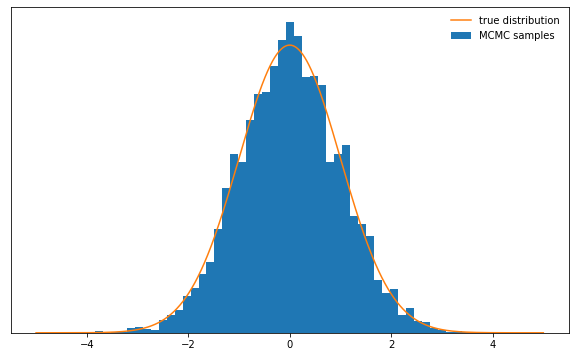

In [7]:
sample_and_display(np.array([2.0]), 3.0, 10000, 500, log_prob)

<h3><b>Ερωτήματα (Μέρος Β)</b></h3>

Να επαναλάβετε για $Δ=30$ και συνολικό αριθμό βημάτων $10000$. Τι παρατηρείτε ότι συμβαίνει στην περίπτωση που χρησιμοποιείτε ένα πολύ μεγάλο βήμα, δηλαδή πολύ μεγάλη τιμή για την παράμετρο $Δ$; Να επαναλάβετε για $Δ=300$, $Δ=3000$ και $Δ=30000$, ώστε να επιβεβαιώσετε το συμπέρασμά σας. Σχολιάστε και το ποσοστό των αποδεκτών βημάτων.

Acceptance rate: 0.111


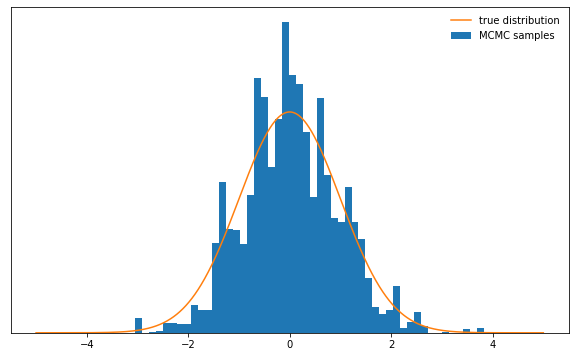

Acceptance rate: 0.011


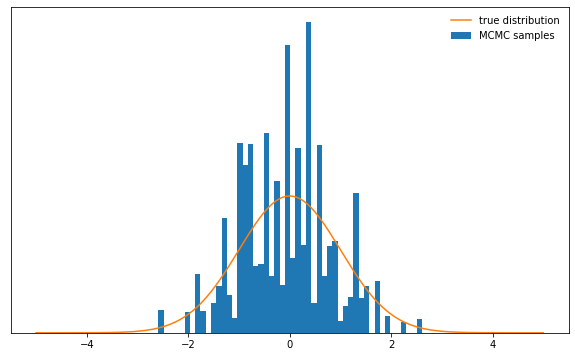

Acceptance rate: 0.001


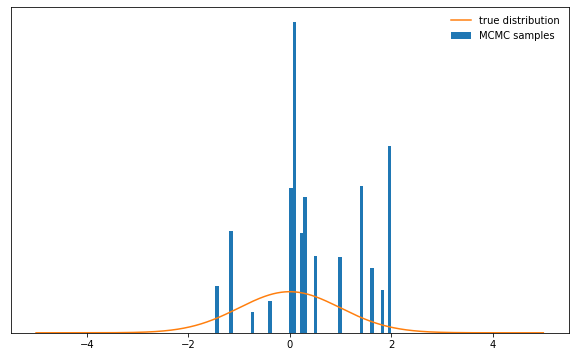

Acceptance rate: 0.000


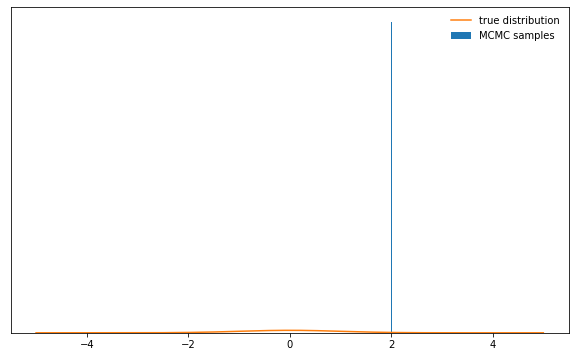

In [8]:
for delta in [30, 300, 3000, 30000]: sample_and_display(np.array([2.0]), delta, 10000, 500, log_prob)

Με την αύξηση της παραμέτρου Δ, το διάστημα της ομοιόμορφης κατανομής ανοίγει και έτσι μειώνεται ο αριθμός των βημάτων που εν τέλει γίνονται αποδεκτά. Συνεπώς, αξιοποιούνται όλο και λιγότερα από τα 10000 και είμαστε όλο και πιο μακριά από την σύγκλιση. 

Να επαναλάβετε για $Δ=0.1$, δηλαδή μία πολύ μικρή τιμή για το βήμα. Τι παρατηρείτε; Είναι ικανοποιητικά τα αποτελέσματά σας; Σχολιάστε και το ποσοστό των αποδεκτών βημάτων. Να επαναλάβετε για $Δ=0.01$.

Acceptance rate: 0.991


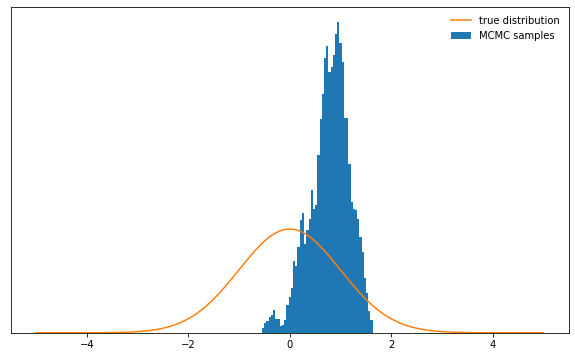

Acceptance rate: 0.998


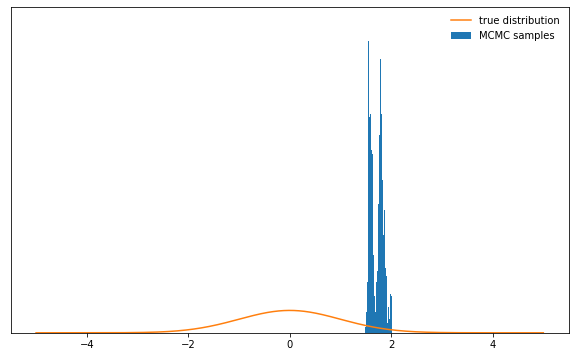

In [9]:
for delta in [0.1, 0.01]: sample_and_display(np.array([2.0]), delta, 10000, 500, log_prob)

Στην συγκεκριμένη περίπτωση έχουμε το αντίθετο πρόβλημα σε σχέση με πριν. Εδώ, το Δ είναι πάρα πολύ μικρό και ναι μεν όλες οι αλλαγές κατάστασης γίνονται αποδεκτές, αλλά δειγματοληπτούμε και εξερευνούμε μια πολύ μικρή περιοχή διότι δεν κινούμαστε αρκετά.

Να επαναλάβετε αυξάνοντας το συνολικό αριθμό βημάτων που θα πραγματοποιηθούν σε $500000$. Τι παρατηρείτε σχετικά με την ακρίβεια των αποτελεσμάτων σας, αλλά και το χρόνο εκτέλεσης του αλγορίθμου <b><i>Metropolis-Hastings</i></b>;

Acceptance rate: 0.990


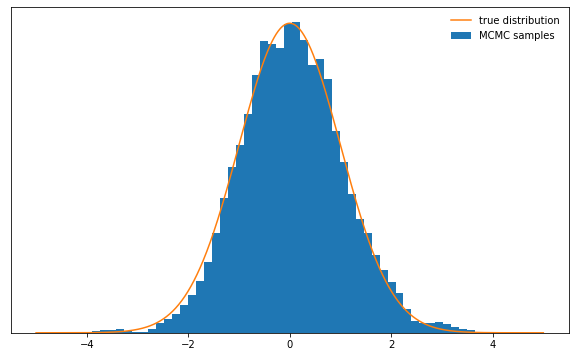

Execution time = 11.949959200000023 seconds


In [10]:
from time import perf_counter
start = perf_counter()
sample_and_display(np.array([2.0]), 0.1, 500000, 25000, log_prob)
end = perf_counter()
print("Execution time = {} seconds".format(end - start))

Αρχικά, παρατηρούμε ότι ο χρόνος εκτέλεσης αυξήθηκε κατ'αντιστοιχία με τα παραπάνω παραδείγματα, ωστόσο το αποτέλεσμα είναι σχεδόν τέλειο, διότι αντισταθμίστηκε το μικρό Δ με τον πολύ μεγάλο αριθμό βημάτων.

Η συνάρτηση <b><i>sample_and_display</i></b> περιλαμβάνει το n_burnin ως τέταρτο όρισμα. Ποια είναι η χρησιμότητα του ορίσματος αυτού; Δοκιμάστε τις παρακάτω τιμές:
<ul>
<li>$Δ=0.1$, αριθμός βημάτων $1000$ και n_burnin=$10$.</li>
<li>$Δ=0.1$, αριθμός βημάτων $500000$ και n_burnin=$490000$.</li>
</ul>
Τι παρατηρείτε;

Acceptance rate: 0.981


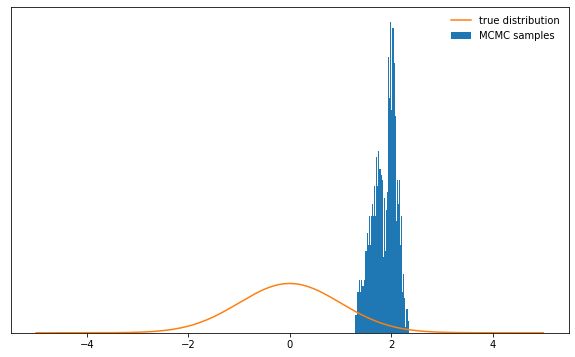

Acceptance rate: 0.991


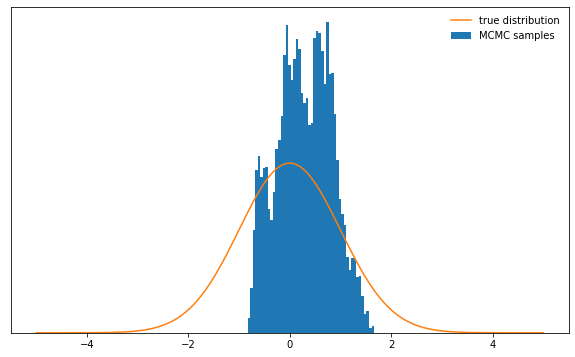

In [11]:
for n_total, n_burnin in [(1000,10), (500000,490000)]:
       sample_and_display(np.array([2.0]), 0.1, n_total, n_burnin, log_prob)

Το n_burnin ουσιαστικά εκφράζει το πλήθος των αρχικών βημάτων που δεν θα συνυπολιστούν στον αλγόριθμο μας, διότι στα πρώτα βήματα απέχουμε σίγουρα από την τελική κατανομή. Από το δεύτερο σχήμα, αυτό που παρατηρούμε είναι ότι δεν χρειάζεται η τιμή του n_burnin να ειναι πάρα πολύ κοντά στον συνολικό αριθμό βημάτων καθώς λαμβάνουμε χειρότερα αποτελέσματα συγκριτικά με την παραπάνω περίπτωση όπου n_burnin = 25000, όπου έχουμε σχεδόν τέλειο fit στην πραγματική κατανομή.